# AIDS Incident Cases In Illinois Department of Publich Health
A dataset that is extracted real time from a website, saved as csv format, Uploaded to the sql database for storage.
This data is based on AIDS cases on the Illinois department of Public Health. It has 3 tables.
1) Aids cases on every county
2) Highest county Aids Cases breakdown
3) Second Highest County Aids Cases Breakdown

In [2]:
import time
import csv
import mysql.connector
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common import NoSuchElementException
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('seaborn-v0_8-notebook')
from dash import Dash, dcc, html, Input, Output
%matplotlib inline
from jupyter_datatables import init_datatables_mode
from plotly.offline import download_plotlyjs, plot, init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [222]:
# Using selenium to extract real time data for the Aids cases on every county
driver = webdriver.Chrome()
driver.maximize_window
driver.get(
    url='https://dph.illinois.gov/topics-services/diseases-and-conditions/hiv-aids/hiv-surveillance/update-reports/2023/february.html')

# waiting for table to load
TableWait = WebDriverWait(driver, 10)
Table = TableWait.until(EC.presence_of_element_located((By.XPATH, "//table[@id='DataTables_Table_10']")))

# get the number of pages on the table
table_text = driver.find_element(By.CSS_SELECTOR, '#DataTables_Table_10_info').text
start_index = table_text.find('of') + 3
last_index = table_text.find('entries') - 1
No_entries =int(table_text[start_index:last_index].strip())
print(f"No Of entries: {No_entries}")

data=[]
for No_entries in range(1, No_entries +1):
    try:
        Table = TableWait.until(EC.presence_of_element_located((By.XPATH, "//table[@id='DataTables_Table_10']")))
        
        # finding elements on the table
        DataRow = Table.find_elements(By.XPATH, ".//tbody/tr")
        for _ in DataRow:
            cells = _.find_elements(By.XPATH, ".//td")
            row = [cell.text for cell in cells]
            data.append(row)

        # checking if the last entry on the table is Illinois
        if any('Illinois' in DataRow for DataRow in data):
            break

        # next element button
        next_element = driver.find_element(By.XPATH, "//a[@id='DataTables_Table_10_next']")
        if 'disabled' in next_element.get_attribute('class'):
            break
        next_element.click()

        time.sleep(10)

    except NoSuchElementException as e:
        print(f'Error: {e}')
        break
        
for row in data:
    print(row)
        
time.sleep(20)
driver.quit()

# saving the data to csv
with open('Aids_Incident_Cases_In_Illinois.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    if data:
        writer.writerow(['County', 'Cases Diagnosed As Of 2/28/2023', 
                         'Cumulative Cases Diagnosed Since 2016', '2016-2023 AIDS Diagnosis Rate'])
    writer.writerows(data)

print()
print('Data successfully Saved as Csv!')

No Of entries: 104
['Adams', '0', '6', '1.25']
['Alexander', '0', '2', '3.6']
['Bond', '0', '1', '0.79']
['Boone', '1', '3', '0.78']
['Brown', '0', '1', '2.02']
['Bureau', '0', '1', '0.41']
['Calhoun', '0', '0', '0']
['Carroll', '0', '0', '0']
['Cass', '0', '2', '2.09']
['Champaign', '0', '45', '3.09']
['Christian', '0', '4', '1.61']
['Clark', '0', '0', '0']
['Clay', '0', '2', '2.03']
['Clinton', '0', '3', '1.1']
['Coles', '0', '3', '0.78']
['Cook', '46', '2898', '7.73']
['Crawford', '0', '4', '2.85']
['Cumberland', '0', '1', '1.27']
['DeKalb', '2', '17', '2.27']
['De Witt', '0', '2', '1.7']
['Douglas', '0', '0', '0']
['DuPage', '2', '100', '1.5']
['Edgar', '0', '0', '0']
['Edwards', '0', '0', '0']
['Effingham', '2', '5', '2.03']
['Fayette', '1', '7', '4.44']
['Ford', '0', '0', '0']
['Franklin', '0', '9', '3.19']
['Fulton', '0', '6', '2.28']
['Gallatin', '0', '1', '2.57']
['Greene', '1', '1', '1.03']
['Grundy', '0', '3', '0.83']
['Hamilton', '0', '1', '1.67']
['Hancock', '0', '1', '0.7

In [9]:
# Using selenium to extract real time data for the Highest county Aids cases breakdown
browser = webdriver.Chrome()
browser.maximize_window
browser.get(
    url='https://dph.illinois.gov/topics-services/diseases-and-conditions/hiv-aids/hiv-surveillance/update-reports/2023/february.html')

# getting the table details
tabledetails = browser.find_element(By.ID, "DataTables_Table_2_wrapper")
rowdetails = tabledetails.find_elements(By.XPATH, ".//tbody/tr")
row_count = len(rowdetails)
print(f'No of Rows: {row_count}')

data = []
for _ in rowdetails:
    cells =_.find_elements(By.XPATH, ".//td")
    row_cell =[cell.text for cell in cells]
    data.append(row_cell)

for row in data:
    print(row)

# Saving the data on a csv file
with open('Highest county Aids cases breakdown.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    if data:
        writer.writerow(['Health Department', 'Cases Diagnosed As Of 2/28/2023', 'Cumulative Cases Diagnosed Since 2016'])
    writer.writerows(data)
print('Data saved to csv format successfully')    

No of Rows: 5
['Chicago Health Dept.', '40', '2177']
['Cook Co. Health Dept.', '6', '677']
['Evanston Health Dept.', '0', '21']
['Oak Park Health Dept.', '0', '13']
['Skokie Health Dept.', '0', '10']
Data saved to csv format successfully


In [4]:
# Table 3 data Extraction using selenium
browser = webdriver.Chrome()
browser.maximize_window()
browser.get(
    url='https://dph.illinois.gov/topics-services/diseases-and-conditions/hiv-aids/hiv-surveillance/update-reports/2023/february.html'
)
Table3 = browser.find_element(By.CSS_SELECTOR, "#DataTables_Table_3_wrapper")
rows = Table3.find_elements(By.XPATH, ".//tbody/tr")
row_count = len(rows)
print(f'No of Rows: {row_count}')

# iterating over the table rows to obtain the data
data = []
for _ in rows:
    cell = _.find_elements(By.XPATH, ".//td")
    row_cell = [cells.text for cells in cell]
    data.append(row_cell)
    
for table in data:
    print(table)

with open('Second Highest County Aids Cases Breakdown.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    if data:
        writer.writerow(['Health Department','Cases Diagnosed As Of 2/28/2023', 'Cumulative Cases Diagnosed Since 2016'])
    writer.writerows(data)
print()
print('Data successfully saved')

time.sleep(10)
browser.quit()


No of Rows: 2
['East Side Health District', '0', '12']
['St. Clair Co. Health Dept.', '1', '104']

Data successfully saved


# Extrapolatory Data Analysis
    # Tasks
- Opening each of the files saved as csv and finding insight and relation between the table data
- cleaning the data by removing duplicates
- replacing Null values
- standardization of the data and data types

In [10]:
df = pd.read_csv('Aids_Incident_Cases_In_Illinois.csv')
df1_copy = df.copy()

In [ ]:
# display all the rows on the dataset
pd.set_option('display.Max_rows',None)

In [12]:
df1_copy.describe()

,Cases Diagnosed As Of 2/28/2023,Cumulative Cases Diagnosed Since 2016,2016-2023 AIDS Diagnosis Rate
count,104.000000,104.000000,103.000000
mean,1.461538,79.403846,1.903010
std,8.654000,491.351050,1.707835
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.790000
50%,0.000000,3.000000,1.610000
75%,0.000000,9.250000,2.690000
max,76.000000,4129.000000,8.750000


In [18]:
df1_copy.dtypes

County                                    object
Cases Diagnosed As Of 2/28/2023            int64
Cumulative Cases Diagnosed Since 2016      int64
2016-2023 AIDS Diagnosis Rate            float64
dtype: object

In [21]:
# checking all the null values
df1_copy.isna().sum()

County                                   0
Cases Diagnosed As Of 2/28/2023          0
Cumulative Cases Diagnosed Since 2016    0
2016-2023 AIDS Diagnosis Rate            1
dtype: int64

In [22]:
# replacing the null value with 0
df1_copy['2016-2023 AIDS Diagnosis Rate'] = df1_copy['2016-2023 AIDS Diagnosis Rate'].fillna(0).astype(float)

In [23]:
df1_copy.isna().sum()

County                                   0
Cases Diagnosed As Of 2/28/2023          0
Cumulative Cases Diagnosed Since 2016    0
2016-2023 AIDS Diagnosis Rate            0
dtype: int64

In [31]:
# number of rows and columns
rows,columns = df1_copy.shape
print(f'Rows: {rows} columns: {columns}')

Rows: 104 columns: 4


In [34]:
# checking for duplicate values
df1_copy.loc[df1_copy.duplicated()] # locates all duplicate values

,County,Cases Diagnosed As Of 2/28/2023,Cumulative Cases Diagnosed Since 2016,2016-2023 AIDS Diagnosis Rate


# Feature Analysis
## Univariant Analysis
- undestanding distribution of the features and potential outliers in the data set

In [36]:
pd.reset_option('display.max_rows', None)

In [41]:
# counting unique values occuring on the data
df1_copy['County'].value_counts()

County
Adams         1
Alexander     1
Bond          1
Boone         1
Brown         1
             ..
Williamson    1
Winnebago     1
Woodford      1
Unknown       1
Illinois      1
Name: count, Length: 104, dtype: int64

In [49]:
# correlation
correlation = round(df1_copy[df1_copy.columns[1:]].corr(),2)

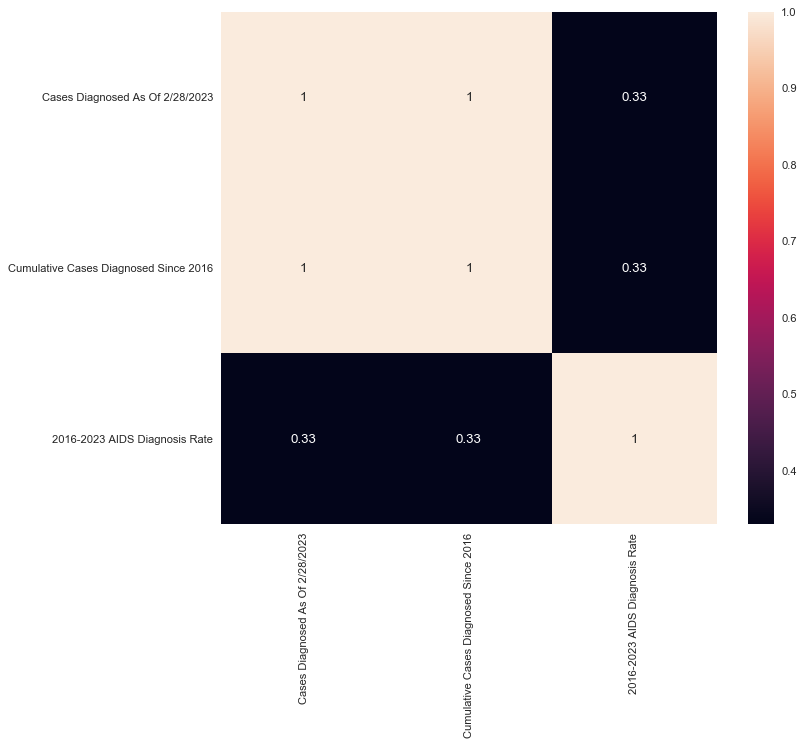

In [195]:
# plotting correlation on a heat map to show their relation
plt.subplots(figsize=(10,8))
sns.heatmap(correlation, annot=True)
plt.show()

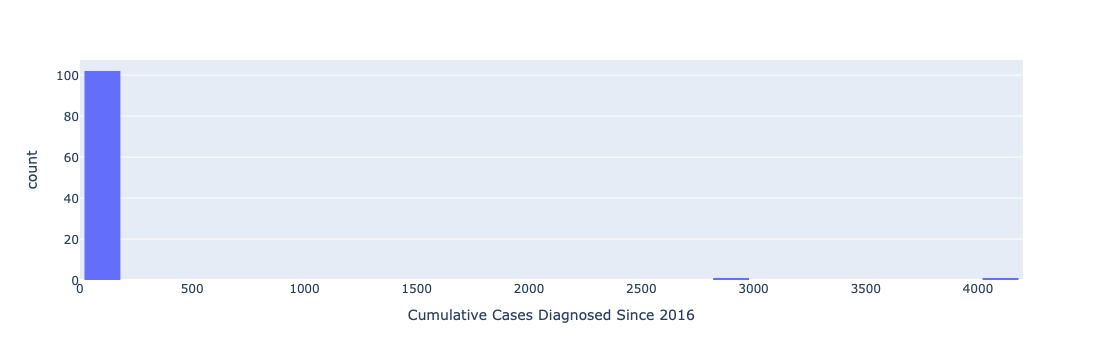

In [136]:
# showing the distribution of the Cumulative Cases Diagnosed Since 2016
fig = px.histogram(df1_copy, x ='Cumulative Cases Diagnosed Since 2016')
fig.update_layout(bargap=0.2)
fig.show()

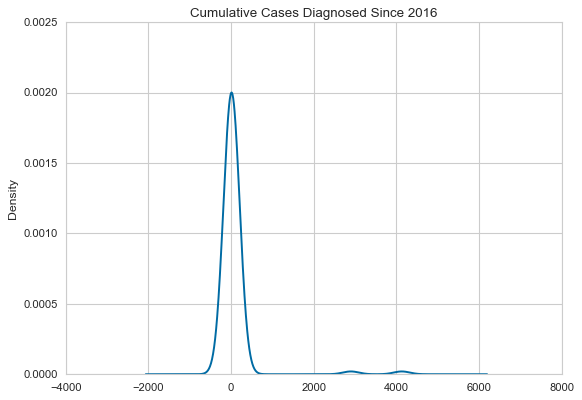

In [196]:
# distribution plot
df1_copy['Cumulative Cases Diagnosed Since 2016'].plot(kind='kde', title='Cumulative Cases Diagnosed Since 2016')
plt.show()

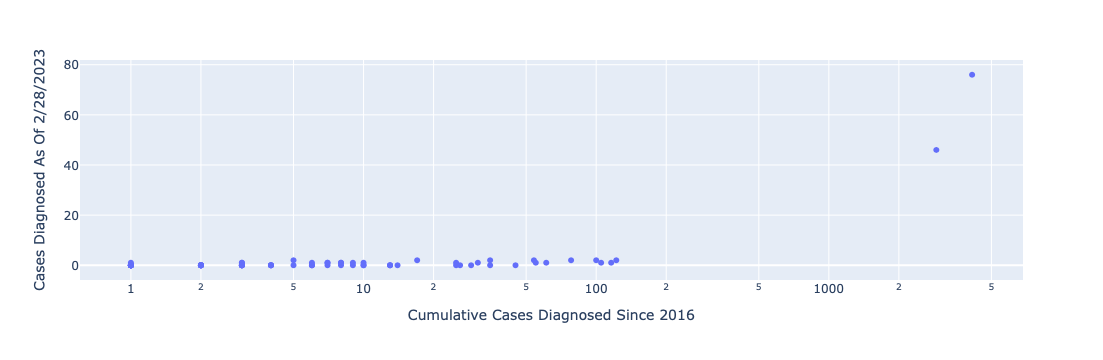

In [138]:
# scatter plot to display outliners
county = df1_copy['County'].head(10)
fig = px.scatter(df1_copy, x='Cumulative Cases Diagnosed Since 2016',
                 y='Cases Diagnosed As Of 2/28/2023', hover_name='County',log_x=True, size_max=100)
fig.show()
# size='County'

# Asking A question on the data set
- what are the County with the highest Cumulative Cases Diagnosed Since 2016

In [192]:
dfGroup = df1_copy.groupby('County')['Cumulative Cases Diagnosed Since 2016']\
            .agg(['min','max']).query('max > 10').sort_values('max')['max']

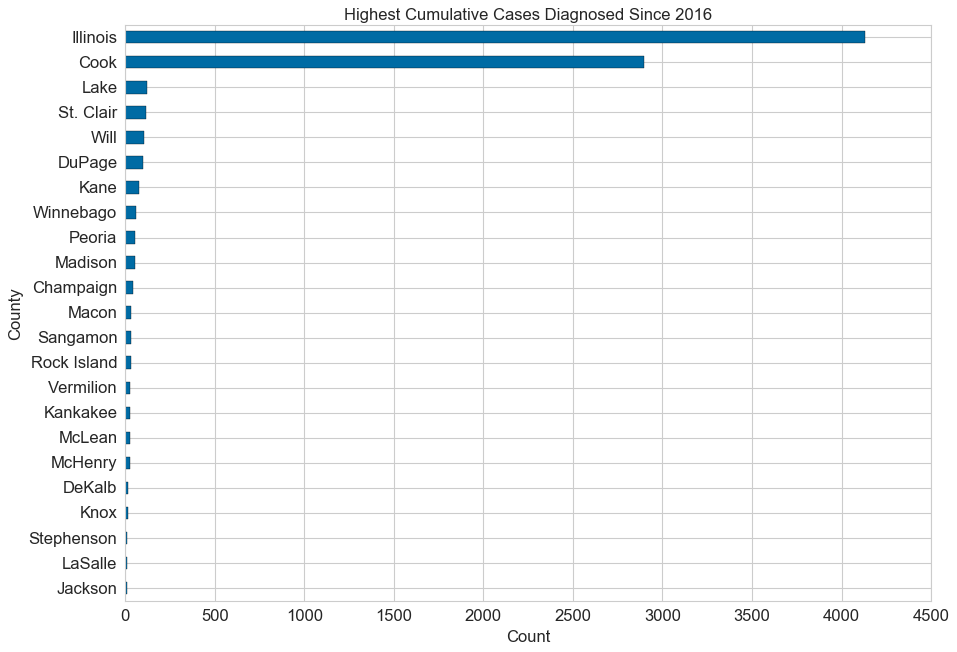

In [211]:
fig= dfGroup.plot(kind='barh', figsize=(13, 9), title='Highest Cumulative Cases Diagnosed Since 2016')
fig.set_title('Highest Cumulative Cases Diagnosed Since 2016',fontsize=15)
fig.set_ylabel('County', fontsize=15)
fig.set_xlabel('Count', fontsize=15)
fig.tick_params(axis='x', labelsize=15)
fig.tick_params(axis='y', labelsize=15)

plt.show()

# Highest County Aids Cases Breakdown
- finding insight on the highest county Aids Cases Breakdown

In [225]:
df = pd.read_csv('Highest county Aids cases breakdown.csv')
df2_copy = df.copy()

In [226]:
df2_copy

,Health Department,Cases Diagnosed As Of 2/28/2023,Cumulative Cases Diagnosed Since 2016
0,Chicago Health Dept.,40,2177
1,Cook Co. Health Dept.,6,677
2,Evanston Health Dept.,0,21
3,Oak Park Health Dept.,0,13
4,Skokie Health Dept.,0,10


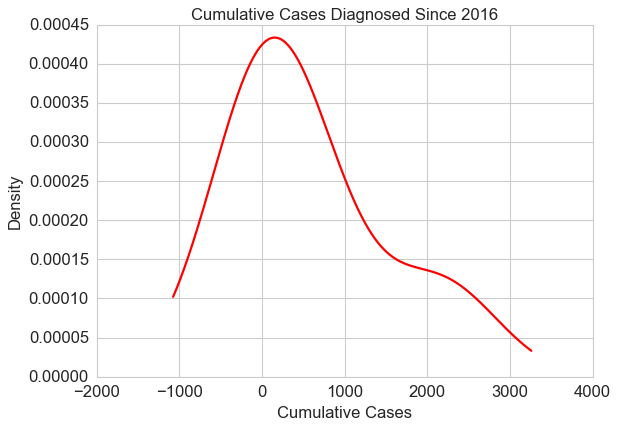

In [251]:
# Cumulative Cases Diagnosed Since 2016 Distribution
ax = df2_copy['Cumulative Cases Diagnosed Since 2016'].plot(kind='kde',
                                                       title='Cumulative Cases Diagnosed Since 2016', linewidth=2,color='red')
ax.set_title('Cumulative Cases Diagnosed Since 2016', fontsize=15)
ax.set_xlabel('Cumulative Cases', fontsize=15)
ax.set_ylabel('Density', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

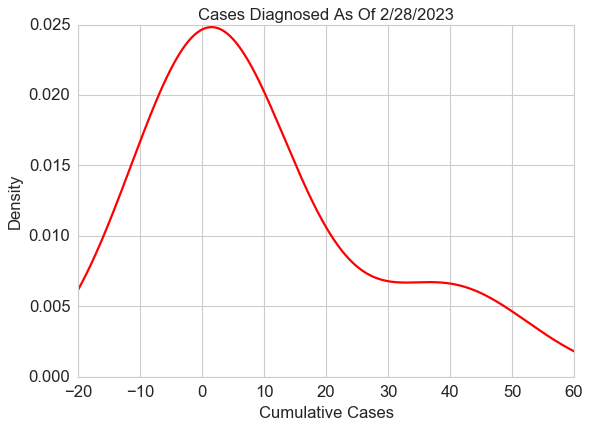

In [252]:
ax = df2_copy['Cases Diagnosed As Of 2/28/2023'].plot(kind='kde',
                                                       title='Cases Diagnosed As Of 2/28/2023', linewidth=2,color='red')
ax.set_title('Cases Diagnosed As Of 2/28/2023', fontsize=15)
ax.set_xlabel('Cumulative Cases', fontsize=15)
ax.set_ylabel('Density', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

In [277]:
# barchart for the group column
df2_copyGrouped = df2_copy.groupby('Health Department')['Cumulative Cases Diagnosed Since 2016']\
                    .agg(['min', 'max']).sort_values('max')['max']

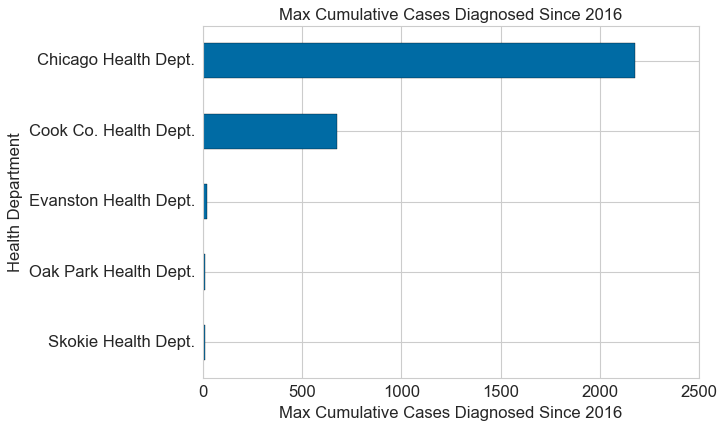

In [283]:
ax = df2_copyGrouped.plot(kind='barh', title='Max Cumulative Cases Diagnosed Since 2016')
ax.set_title('Max Cumulative Cases Diagnosed Since 2016', fontsize=15)
ax.set_ylabel('Health Department', fontsize=15)
ax.set_xlabel('Max Cumulative Cases Diagnosed Since 2016', fontsize=15)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.show()

In [14]:
# joining diffrent datasets
data = pd.read_csv('/Users/briankimanzi/Documents/python /webscraping/February_2023_Hiv_surveillance_update_report.csv')
data2 = pd.read_csv('Aids_Incident_Cases_In_Illinois.csv')
dataMerge = pd.merge(data, data2, on='County', how='outer')
dataMerge.to_csv('Hiv & Aids incident Cases.csv')

In [260]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
dataMerge.to_csv('Merged Dataset Cases Diagnose.csv')